We'll be answering the following questions in this project:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?

In [57]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.setstyle('whitegrid')

In [59]:
%matplotlib inline

In [60]:
from pandas.io.data import DataReader
from datetime import datetime
from __future__ import division

Let's use Yahoo and pandas to grab some data for some tech stocks

In [61]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
non_tech_list = ['TSLA', 'UGA']

In [62]:
end = datetime.now()
start = datetime(end.year -1, end.month, end.day)


In [63]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    
for stock1 in non_tech_list:
    globals()[stock1] = DataReader(stock1, 'yahoo', start, end)

In [64]:
AAPL.head()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,102.610001,105.370003,102.000000,105.349998,67649400,103.057063
2016-01-05,105.750000,105.849998,102.410004,102.709999,55791000,100.474523
2016-01-06,100.559998,102.370003,99.870003,100.699997,68457400,98.508268
2016-01-07,98.680000,100.129997,96.430000,96.449997,81094400,94.350769
2016-01-08,98.550003,99.110001,96.760002,96.959999,70798000,94.849671


In [65]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,104.507778,105.427183,103.690278,104.604008,3.838384e+07,103.597547
std,7.586133,7.554376,7.680722,7.640743,1.709904e+07,8.033139
min,90.000000,91.669998,89.470001,90.339996,1.142440e+07,89.394274
25%,97.295000,98.205000,96.542502,97.137499,2.695660e+07,95.808918
50%,105.494999,106.279999,104.824997,105.750000,3.368495e+07,104.201492
75%,110.382502,111.562502,109.670002,110.977499,4.451040e+07,110.293901
max,118.180000,118.690002,117.449997,118.250000,1.333697e+08,117.645979


In [66]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


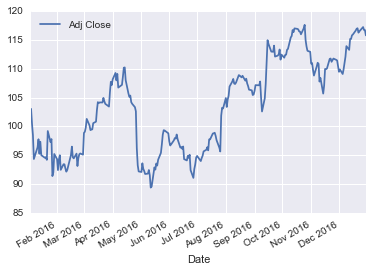

In [67]:
AAPL['Adj Close'].plot(legend = True)

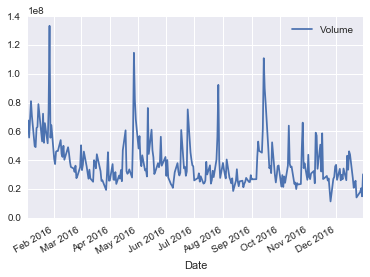

In [68]:
AAPL['Volume'].plot(legend = True)

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

In [69]:
ma_day = [10,20,50]

In [70]:
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma, center=False).mean()

Now let's go ahead and plot all the additional Moving Averages

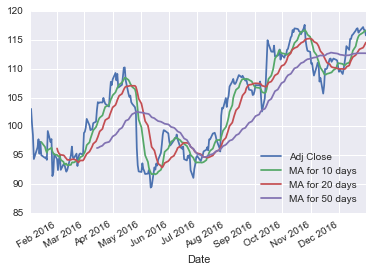

In [71]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False)

Section 2 - Daily Return Analysis

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

In [72]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

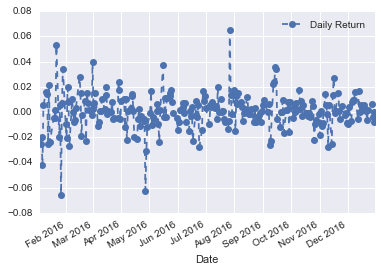

In [73]:
AAPL['Daily Return'].plot(legend = True, linestyle='--', marker='o')

Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

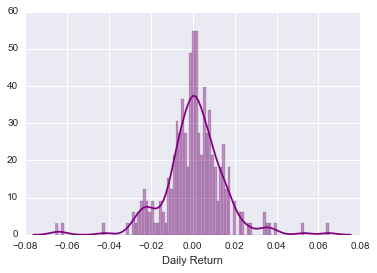

In [74]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color='purple')

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

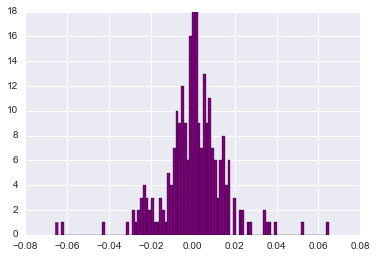

In [75]:
AAPL['Daily Return'].hist(bins =100, color='purple')

In [76]:
closing_df = DataReader(tech_list,'yahoo', start, end)['Adj Close']

In [77]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-01-04,103.057063,636.989990,741.840027,53.336436
2016-01-05,100.474523,633.789978,742.580017,53.579760
2016-01-06,98.508268,632.650024,743.619995,52.606467
2016-01-07,94.350769,607.940002,726.390015,50.776676
2016-01-08,94.849671,607.049988,714.469971,50.932406


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [78]:
tech_rets = closing_df.pct_change()

In [79]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.025059,-0.005024,0.000998,0.004562
2016-01-06,-0.019570,-0.001799,0.001400,-0.018165
2016-01-07,-0.042205,-0.039058,-0.023170,-0.034783
2016-01-08,0.005288,-0.001464,-0.016410,0.003067


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

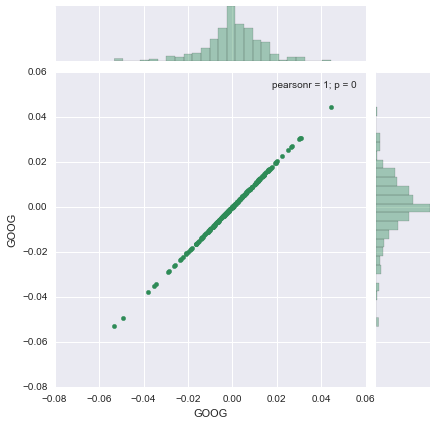

In [80]:
sns.jointplot('GOOG', 'GOOG',tech_rets,kind='scatter',color='seagreen')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.

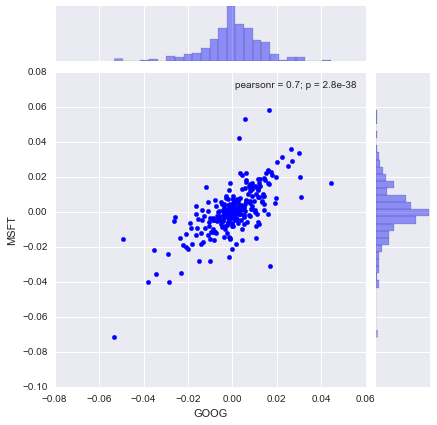

In [81]:
sns.jointplot('GOOG', 'MSFT',tech_rets,kind='scatter',color='blue')

In [82]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.025059,-0.005024,0.000998,0.004562
2016-01-06,-0.019570,-0.001799,0.001400,-0.018165
2016-01-07,-0.042205,-0.039058,-0.023170,-0.034783
2016-01-08,0.005288,-0.001464,-0.016410,0.003067


 We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons

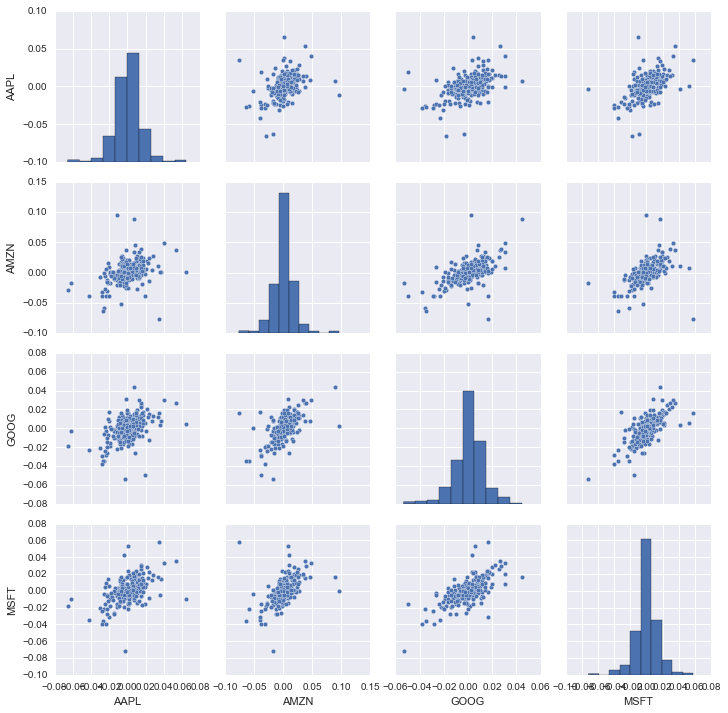

In [83]:
sns.pairplot(tech_rets.dropna())

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

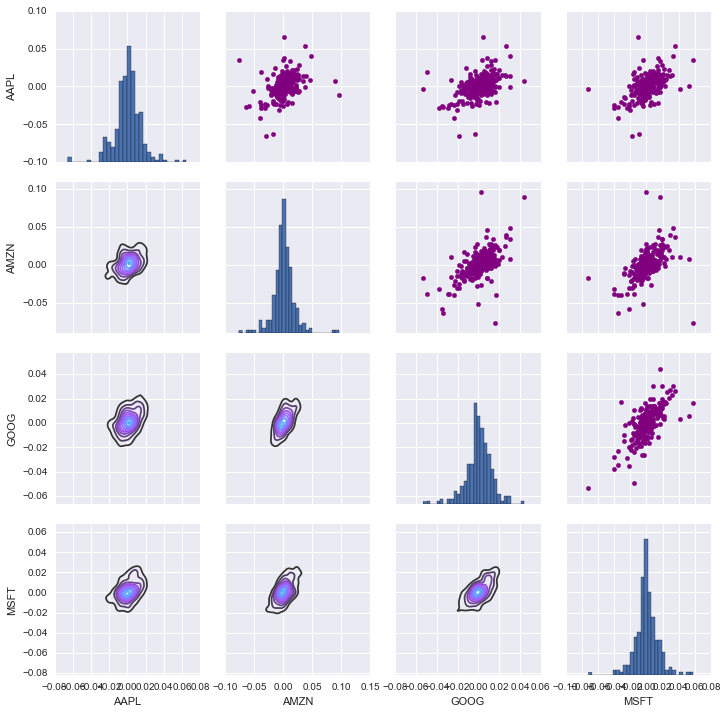

In [84]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color = 'purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

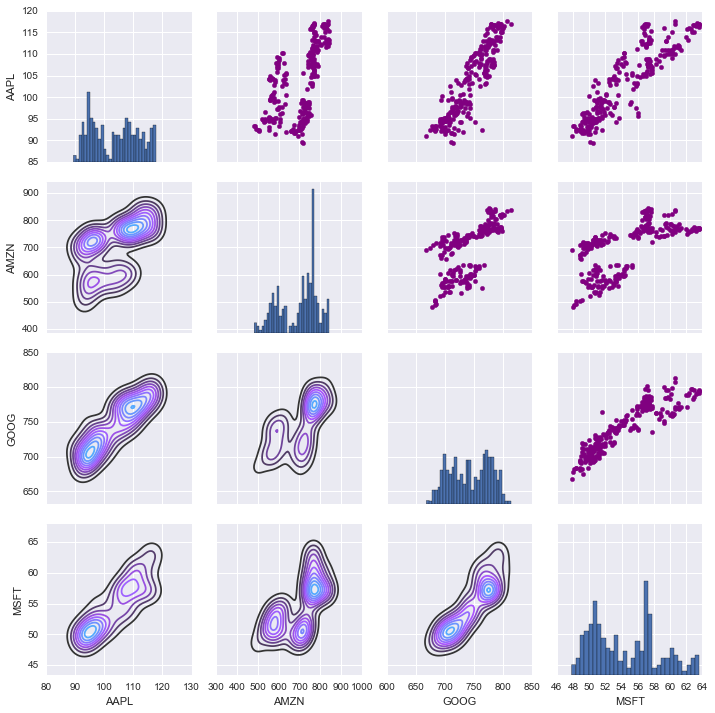

In [85]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter, color = 'purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

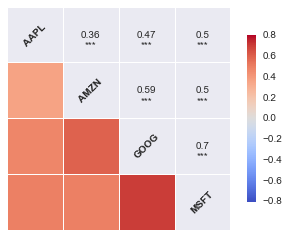

In [86]:
sns.corrplot(tech_rets.dropna(), annot=True)

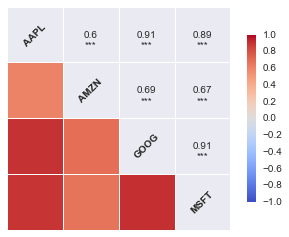

In [87]:
sns.corrplot(closing_df, annot=True)

Just like suspected in our PairPlot we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

Risk Analysis

Comparing the expected return with the standard deviation of the daily returns.

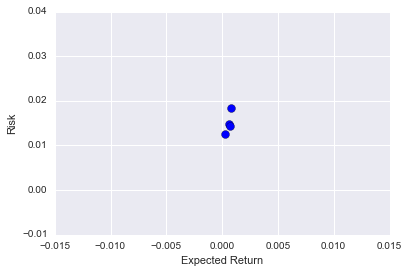

In [88]:
rets = tech_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

Value at risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns.

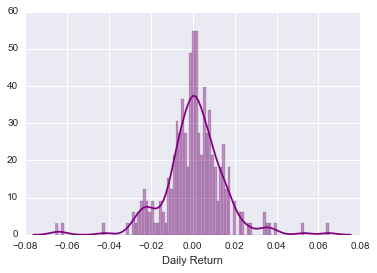

In [89]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

Now we can use quantile to get the risk value for the stock.

In [90]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-01-05,-0.025059,-0.005024,0.000998,0.004562
2016-01-06,-0.019570,-0.001799,0.001400,-0.018165
2016-01-07,-0.042205,-0.039058,-0.023170,-0.034783
2016-01-08,0.005288,-0.001464,-0.016410,0.003067
2016-01-11,0.016192,0.017610,0.002184,-0.000573


In [91]:
rets['AAPL'].quantile(0.05)

-0.023107282341668645

-0.02859644482707982

The 0.05 empirical quantile of daily returns is at -0.02. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.

Value at Risk using the Monte Carlo method:

In [92]:
days = 365
dt = 1/365
mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

Next, we will create a function that takes in the starting price and number of days, and uses teh sigma and mu we already calculated form out daily returns

In [93]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price
        

In [94]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,743.000000,744.059998,731.257996,741.840027,3272800,741.840027
2016-01-05,746.450012,752.000000,738.640015,742.580017,1950700,742.580017
2016-01-06,730.000000,747.179993,728.919983,743.619995,1947000,743.619995
2016-01-07,730.309998,738.500000,719.059998,726.390015,2963700,726.390015
2016-01-08,731.450012,733.229980,713.000000,714.469971,2450900,714.469971


In [95]:
start_price = 649.0

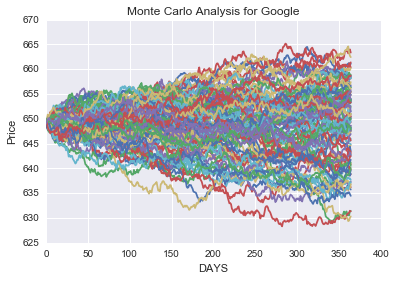

In [96]:
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel('DAYS')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

Let's go ahead and get a histogram of the end results for a much larger run:

In [97]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days -1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

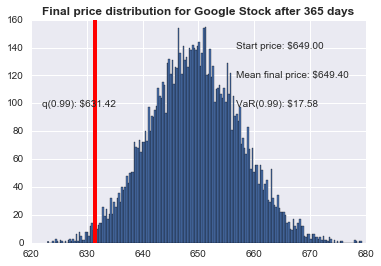

In [98]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins =200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $18.38 for every investment of 569.85 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $18.38 at risk 99% of the time from our Monte Carlo Simulation.

Some other Analysis:

In [99]:
TSLA.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,230.720001,231.380005,219.000000,223.410004,6827100,223.410004
2016-01-05,226.360001,226.889999,220.000000,223.429993,3186800,223.429993
2016-01-06,220.000000,220.050003,215.979996,219.039993,3779100,219.039993
2016-01-07,214.190002,218.440002,213.669998,215.649994,3554300,215.649994
2016-01-08,217.860001,220.440002,210.770004,211.000000,3628100,211.000000


In [100]:
UGA.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,30.110001,30.719999,29.500000,29.719999,175800,29.719999
2016-01-05,29.309999,29.350000,28.879999,28.990000,65300,28.990000
2016-01-06,27.389999,27.860001,26.600000,27.020000,355800,27.020000
2016-01-07,26.680000,27.080000,26.290001,26.549999,130500,26.549999
2016-01-08,26.420000,26.420000,25.629999,25.950001,120000,25.950001


In [101]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


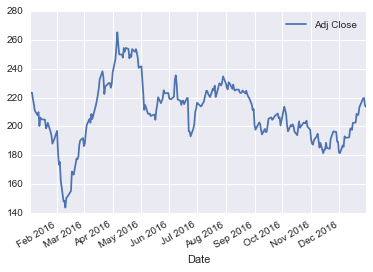

In [102]:
TSLA['Adj Close'].plot(legend=True)

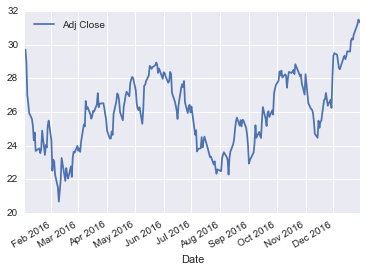

In [103]:
UGA['Adj Close'].plot(legend=True)

In [104]:
TSLA['Daily Returns'] = TSLA['Adj Close'].pct_change()
UGA['Daily Returns'] = UGA['Adj Close'].pct_change()

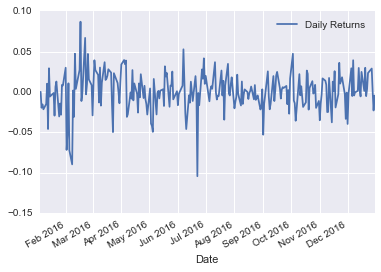

In [105]:
TSLA['Daily Returns'].plot(legend= True)

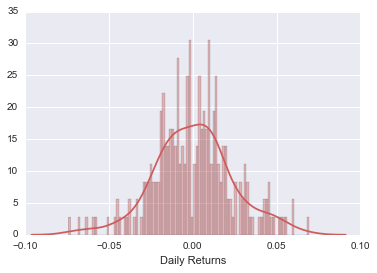

In [106]:
sns.distplot(UGA['Daily Returns'].dropna(), bins = 100, color = 'indianred')

In [107]:
closing_df_2 = DataReader(non_tech_list, 'yahoo',start, end)['Adj Close']

In [108]:
non_tech_rets = closing_df_2.pct_change()

In [109]:
non_tech_rets.head()

,TSLA,UGA
Date,,
2016-01-04,NaN,NaN
2016-01-05,0.000089,-0.024563
2016-01-06,-0.019648,-0.067954
2016-01-07,-0.015477,-0.017395
2016-01-08,-0.021563,-0.022599


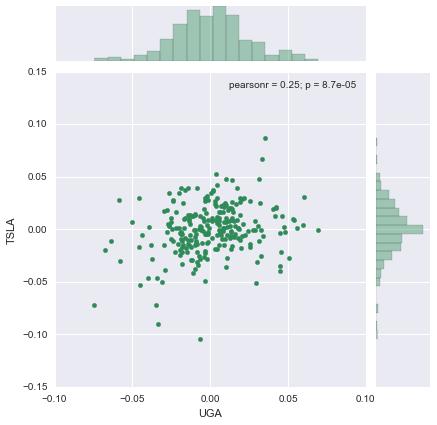

In [110]:
sns.jointplot('UGA', 'TSLA',non_tech_rets, kind='scatter',color ='seagreen')

D:\Anaconda\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


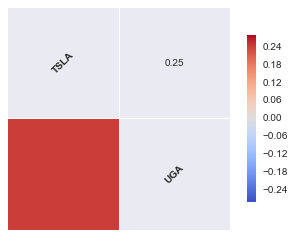

In [111]:
sns.corrplot(non_tech_rets, annot=True)

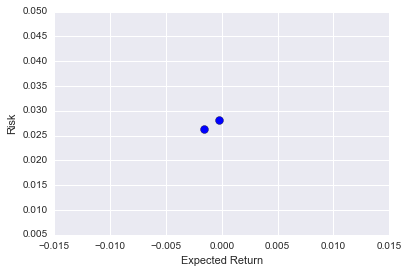

In [67]:
rets = non_tech_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')